In [27]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [28]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [29]:
import pandas as pd

pd.DataFrame(wine.data, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.20, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

clf = clf.fit(X_train, y_train)
rfc = rfc.fit(X_train, y_train)
score_c = clf.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)

print("Single Tree:{}".format(score_c), "\n Random Forest:{}".format(score_r))

Single Tree:0.9444444444444444 
 Random Forest:1.0


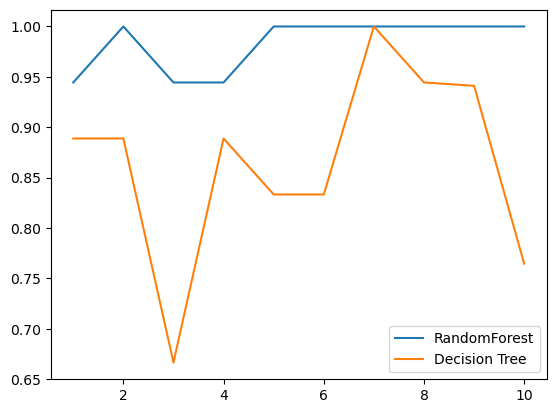

In [31]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier(random_state=42)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label="RandomForest")
plt.plot(range(1, 11), clf_s, label="Decision Tree")
plt.legend()
plt.show()

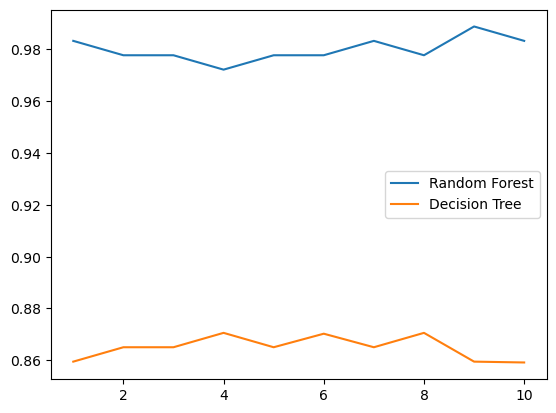

In [32]:
RandomForestScoreList = []
DecisionTreeScoreList = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    RandomForestScoreList.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    DecisionTreeScoreList.append(clf_s)

plt.plot(range(1, 11), RandomForestScoreList, label="Random Forest")
plt.plot(range(1, 11), DecisionTreeScoreList, label="Decision Tree")
plt.legend()
plt.show()

In [ ]:
ScoreList = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=-1, random_state=42)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10, n_jobs=-1 ).mean()
    ScoreList.append(rfc_s)

0.9888888888888889 93


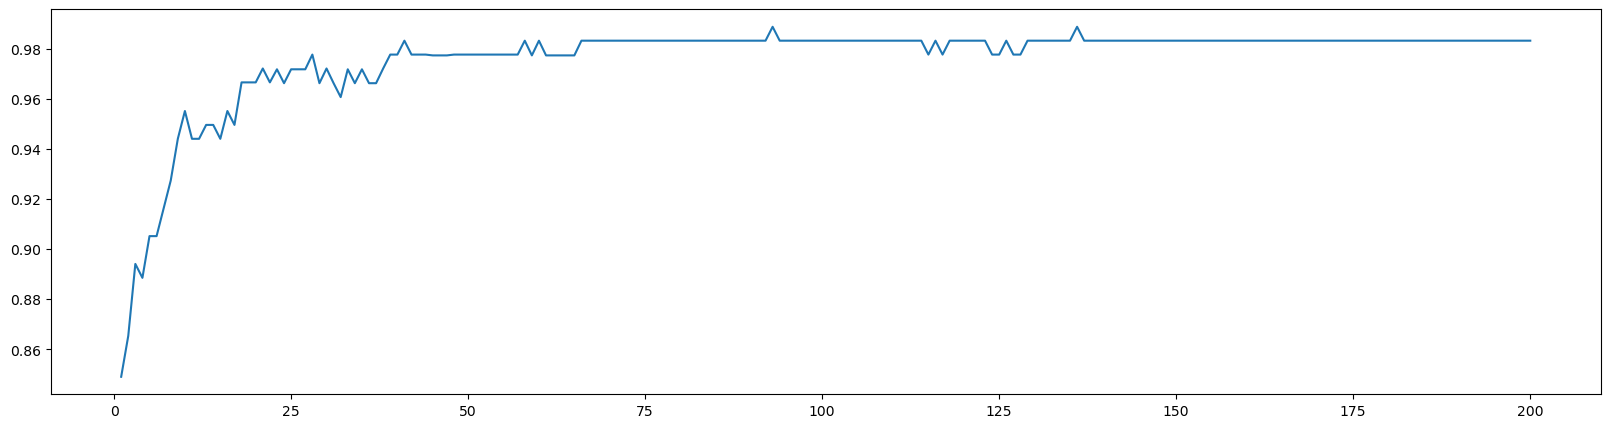

In [34]:
print(max(ScoreList),ScoreList.index(max(ScoreList))+1)#打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
plt.figure(figsize=[20,5])
plt.plot(range(1,201),ScoreList)
plt.show()